### 1.1 Цель
Предсказание оценки качества вина

### 1.2 Описание 
The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

### 2.1 Импорт библиотек

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,recall_score

### 2.2 Загрузка данных

In [2]:
df = pd.read_csv('winequalityN.csv')

### 2.3 Информация о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 2.4 Обработка данных
Работа с пропусками, преобразование переменных, балансировка классов

In [4]:
df = df.dropna()

<AxesSubplot:>

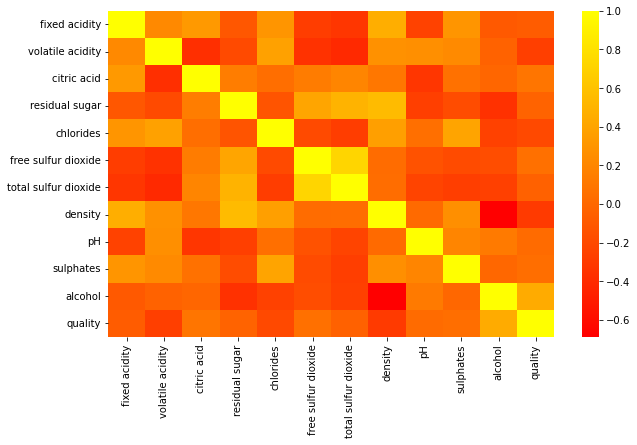

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='autumn')

In [6]:
df_dummies = pd.concat([pd.get_dummies(df['type']), df], axis=1)

In [7]:
df_dummies.drop('type', inplace=True, axis=1)

(array([4870.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1593.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

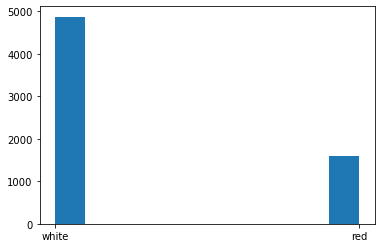

In [8]:
plt.hist(df['type'])

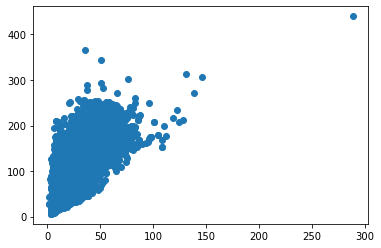

In [9]:
plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'],)

#### Избавляемся от коррелирующих признаков

In [10]:
df_dummies.drop('free sulfur dioxide', inplace=True, axis=1)

#### Сохраняем промежуточные измененные данные

In [11]:
df_dummies.to_csv('df_dummies.csv',mode='x')

In [13]:
df_balanced = df_dummies[df_dummies['red']==0].iloc[:df_dummies[df_dummies['red']==1].count()[1]]

In [14]:
df_balanced = pd.concat([df_balanced, df_dummies[df_dummies['red']==1]],axis=0)

(array([1593.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1593.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

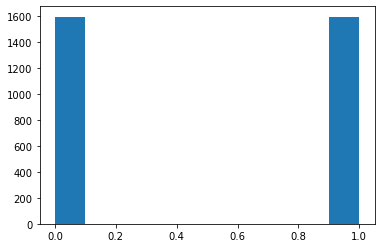

In [15]:
plt.hist(df_balanced.red)

In [16]:
for i in df_balanced.columns[:-1]:
    df_balanced[i] = df_balanced[i]/df_balanced[i].max()

#### Сохраняем промежуточные измененные данные

In [17]:
df_balanced.to_csv('df_balanced.csv',mode='w')

### 3 Подготавливаем тренировочные и тестовые данные

In [18]:
X, y = df_balanced.drop('quality',axis=1), df_balanced['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4 Выбираем модели машинного обучения

#### 4.1 Линейная регрессия

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
mean_squared_error(y_test, lr.predict(X_test))

0.5211724047057278

#### 4.2 SVR

In [42]:
svr = SVR(kernel='poly', degree=5)

In [43]:
svr.fit(X_train, y_train)

SVR(degree=5, kernel='poly')

In [45]:
mean_squared_error(y_test, svr.predict(X_test))

0.4960142195085669

#### 4.3 KNN

In [71]:
knn = KNeighborsClassifier()

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
mean_squared_error(y_test, knn.predict(X_test))

0.725705329153605

### 5 Оценка результатов 

In [85]:
print(f' MSE для регрессии: {round(mean_squared_error(y_test, lr.predict(X_test)),3)}')
print(f' MSE для SVR: {round(mean_squared_error(y_test, svr.predict(X_test)),3)}')
print(f' MSE для KNN: {round(mean_squared_error(y_test, knn.predict(X_test)),3)}')

 MSE для регрессии: 0.521
 MSE для SVR: 0.496
 MSE для KNN: 0.726


#### Лучше всего себя показала модель SVR

### 6 Развертывние 